In [1]:
!pip install miniball
!pip install torch-geometric
import torch
!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git
from miniball import get_bounding_ball
import pickle
import bz2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for miniball: filename=miniball-1.1.0-py3-none-any.whl size=5304 sha256=d7f22ba391a3dfac7cc52d7c183e1cba26975c429753b25ccafa4c77b5a47b3a
  Stored in directory: /root/.cache/pip/wheels/83/e2/cb/2b515b3c3386485dcd1e5508096108afb7a7b4b8d3cc46987e
Successfully built miniball
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 KB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 26.5 MB/s eta 0:00:00
  Created wheel for torch-geometric: filename=torch_geometric-2.2.0-py3-none-any.whl size=773302 sha256=47303b8bee3673504b237919f34513e438e8a42c7bbf596a85faa8185b65b12a
  Stored in directory: /root/.cache/pip/wheels/59/a3/20/198928106d3169865ae73afcbd3d3d1796cf6b429b55c

Found existing installation: torch-geometric 2.2.0
Uninstalling torch-geometric-2.2.0:
  Successfully uninstalled torch-geometric-2.2.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 43.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 44.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 29.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/p

In [2]:
#load the dataset
path = '/content/dataset.pkl.bz2'


print('Loading dataset from cache...')
data = None
with bz2.BZ2File(path, 'rb') as f:
    data = pickle.load(f)

Loading dataset from cache...


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

In [5]:
def addlabels(x,y,ax):
    for i in range(len(x)):
        ax.text(i, y[i], y[i], ha = 'center')

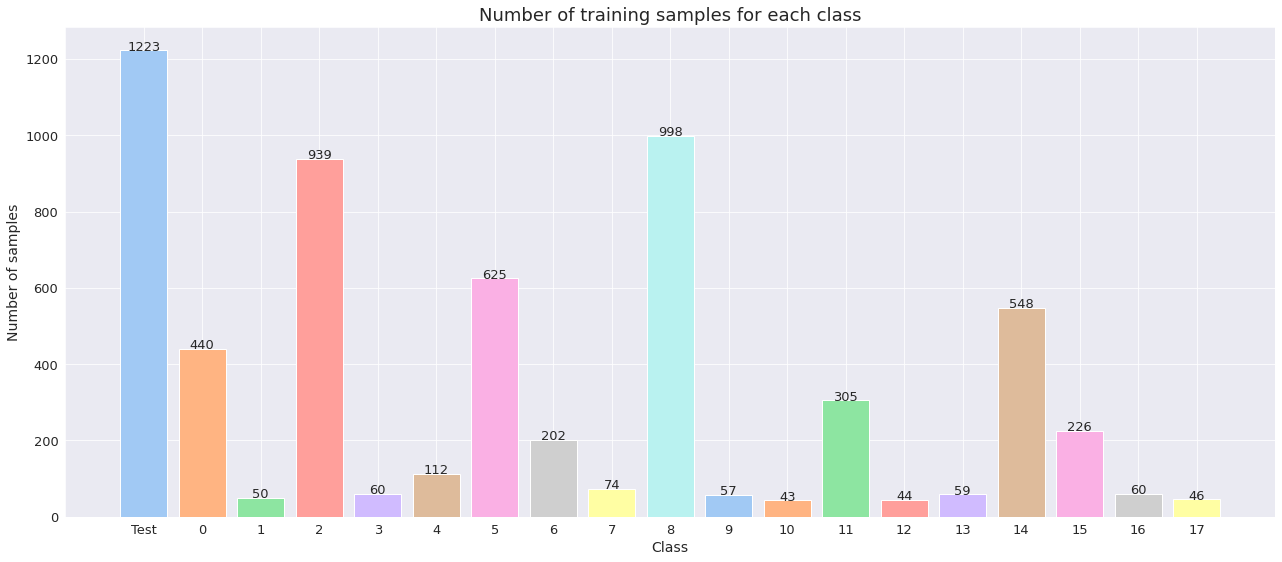

In [15]:
#distribution of the classes trought the training set
protein_labels = data['protein_labels']
cls, counts_labels = np.unique(protein_labels, return_counts=True)
cls = list(map(str, cls))
cls[0] = 'Test'
total_training_samples = np.sum(counts_labels) - counts_labels[0]

#axes
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(18, 8), tight_layout=True)
colors = sns.color_palette('pastel')

#Numbers
ax.bar(cls, counts_labels, color=colors)
addlabels(cls, counts_labels, ax)
ax.set(xlabel = 'Class', ylabel = 'Number of samples', title = 'Number of training samples for each class')


plt.show()

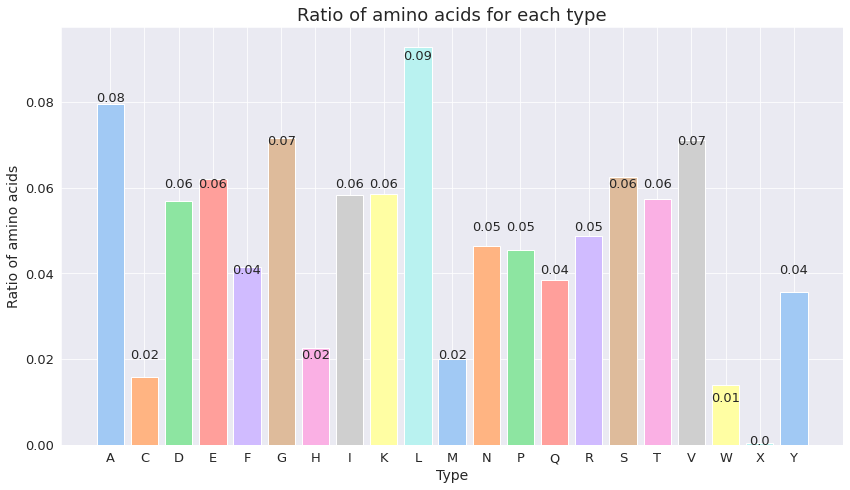

In [20]:
#distribution of the amino acids through the proteins 

amino_acids = 'ACDEFGHIKLMNPQRSTVWXY'

sequences = data['sequences']
seqs = [x for l in sequences for x in l]
cls, counts = np.unique(seqs, return_counts=True)
cls = list(map(lambda a: amino_acids[a], cls))
total_aa = np.sum(counts)

#axes
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(12, 7), tight_layout=True)
colors = sns.color_palette('pastel')

#Ratio
ax.bar(cls, counts/total_aa, color=colors)
addlabels(cls, np.round(counts/total_aa, 2), ax)
ax.set(xlabel = 'Type', ylabel = 'Ratio of amino acids', title = 'Ratio of amino acids for each type')

plt.show()


In [ ]:
from tqdm import tqdm
#distribution of the miniball for each class

graphs = data['graphs']
miniballs = [np.sqrt(get_bounding_ball(graph.pos.numpy())[1]) for graph in tqdm(graphs, position=0)]

In [ ]:
means = np.array([0 for i in range(len(cls))])
for i in range(len(graphs)):
  means[protein_labels[i]+ 1] += miniballs[i]
for i in range(len(cls)):
  means[i] /= counts_labels[i]

stds = np.array([0 for i in range(len(cls))])
for i in range(len(graphs)):
  stds[protein_labels[i]+1] += (miniballs[i]-means[protein_labels[i]+1])**2
for i in range(len(cls)):
  stds[i] /= counts_labels[i]
  stds[i] = np.sqrt(stds[i])

#axes
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(18, 8), tight_layout=True)
colors = sns.color_palette('pastel')

ax[0].bar(cls, means, color=colors)
addlabels(cls, means, ax[0])
ax[0].set(xlabel = 'Class', ylabel = 'Miniball mean', title = 'Miniball mean for each class')

ax[1].bar(cls, stds, color=colors)
addlabels(cls, stds, ax[1])
ax[1].set(xlabel = 'Class', ylabel = 'Miniball std', title = 'Miniball std for each class')

plt.show()



In [ ]:
#visualization of some graphs
import networkx as nx
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx

graph = graphs[151]

colors = [np.random.random(4) for cl in cls]
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')

for i, node in enumerate(graph.pos):
  x, y, z = node
  clnode = 0
  for cl in range(len(cls)):
    if graph.x[i, cl] == 1:
      clnode = cl
      break
  ax.scatter(x, y, z, marker = 'o', c=colors[clnode])

plt.show()

In [ ]:
#statistics on the number of nodes and the number of edges

lens = [len(seq) for seq in sequences]
nums = [graph.edge_attr.shape[0] for graph in graphs]

In [ ]:
print(np.min(lens), np.max(lens), np.mean(lens), np.median(lens), np.quantile(lens, 0.25), np.quantile(lens, 0.75))
print(np.min(nums), np.max(nums), np.mean(nums), np.median(nums), np.quantile(nums, 0.25), np.quantile(nums, 0.75))

9 989 257.28424153166424 221.0 129.0 340.5
55 20417 4721.678939617084 3996.0 2187.0 6491.0
